In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline

In [2]:
df = pd.read_csv('pokemon.csv')
df.shape

(800, 12)

In [3]:
df.rename(columns={'Type 1': 'type_1', 'Type 2': 'type_2', 'Sp. Atk': 'special_attack', 'Sp. Def': 'special_defense'}, inplace=True)

In [4]:
df.columns = map(str.lower, df.columns)

In [5]:
df.head()

,#,name,type_1,type_2,hp,attack,defense,special_attack,special_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [6]:
df.describe()

,#,hp,attack,defense,special_attack,special_defense,speed,generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


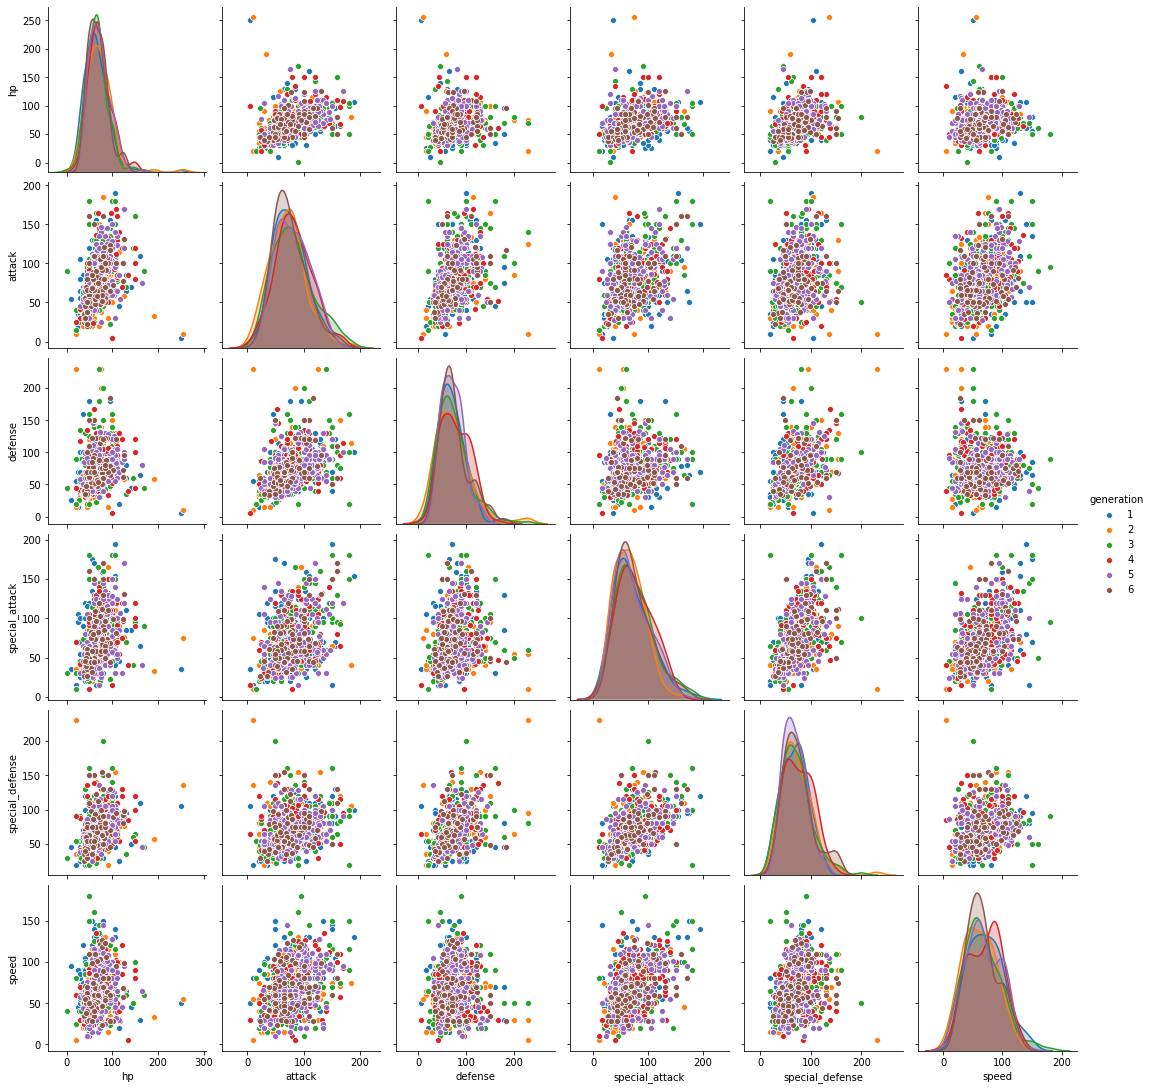

In [7]:
sb.pairplot(df[['hp','attack','defense','special_attack','special_defense','speed','generation']], hue='generation');

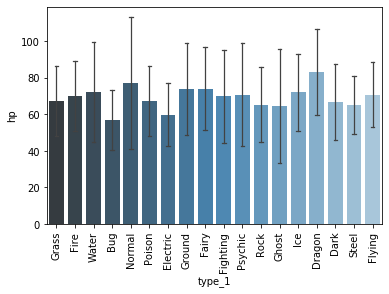

In [8]:
sb.barplot(data=df, x='type_1', y='hp', errwidth='1.25', palette="Blues_d", capsize=.2, ci='sd')
plt.xticks(rotation=90)
plt.show()

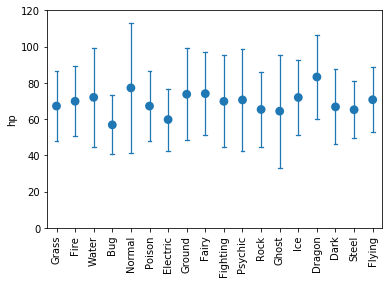

In [9]:
sb.pointplot(data=df, x='type_1', y='hp', errwidth='1.25', capsize=.2, ci='sd', linestyles='')
plt.xticks(rotation=90)
plt.ylim(0,120)
plt.xlabel('')
plt.show()

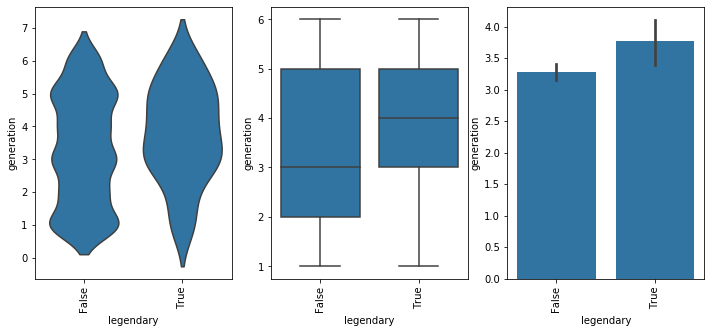

In [10]:
plt.figure(figsize = [12, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
sb.violinplot(data = df, x = 'legendary', y = 'generation', inner = None,
              color = base_color)
plt.xticks(rotation = 90)

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data = df, x = 'legendary', y = 'generation', color = base_color)
plt.xticks(rotation = 90)

# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sb.barplot(data = df, x = 'legendary', y = 'generation', color = base_color)
plt.xticks(rotation = 90)

plt.show()

Text(0, 0.5, 'hp')

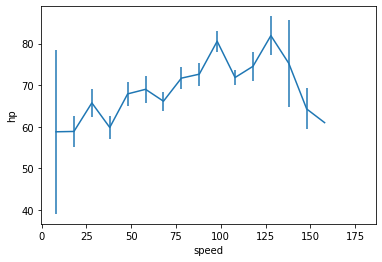

In [11]:
# set bin edges, compute centers
bin_size = 10
xbin_edges = np.arange(3, df['speed'].max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]

# compute statistics in each bin
data_xbins = pd.cut(df['speed'], xbin_edges, right = False, include_lowest = True)
y_means = df['hp'].groupby(data_xbins).mean()
y_sems = df['hp'].groupby(data_xbins).sem()

# plot the summarized data
plt.errorbar(x = xbin_centers, y = y_means, yerr = y_sems)
plt.xlabel('speed')
plt.ylabel('hp')

Text(0, 0.5, 'hp')

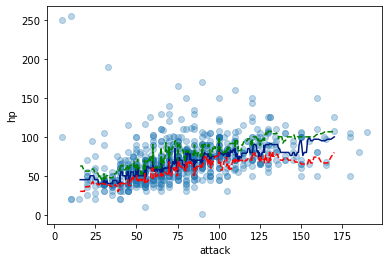

In [12]:
# compute statistics in a rolling window
df_window = df.sort_values('attack').rolling(15)
x_winmean = df_window.mean()['attack']
y_median = df_window.median()['hp']
y_q1 = df_window.quantile(.25)['hp']
y_q3 = df_window.quantile(.75)['hp']

# plot the summarized data
base_color = sb.color_palette()[0]
line_color = sb.color_palette('dark')[0]
plt.scatter(data = df, x = 'attack', y = 'hp', alpha=0.3)
plt.errorbar(x = x_winmean, y = y_median, c = line_color)
plt.errorbar(x = x_winmean, y = y_q1, c = 'red', linestyle = '--')
plt.errorbar(x = x_winmean, y = y_q3, c = 'green', linestyle = '--')

plt.xlabel('attack')
plt.ylabel('hp')

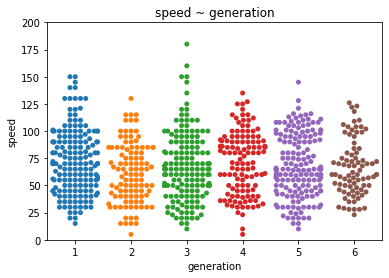

In [13]:
sb.swarmplot(y=df['speed'], x=df['generation'])
plt.ylim(0,200)
plt.title('speed ~ generation');

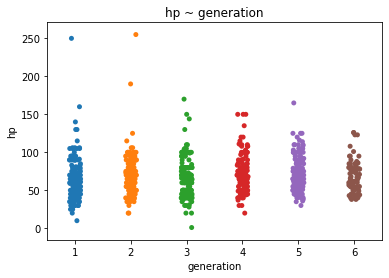

In [14]:
sb.stripplot(y=df['hp'], x=df['generation'])
plt.title('hp ~ generation');

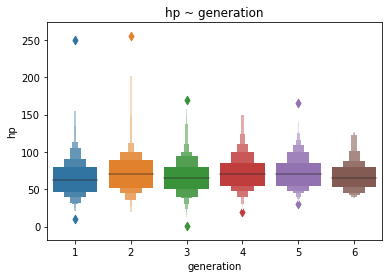

In [15]:
sb.boxenplot(y=df['hp'], x=df['generation'])
plt.title('hp ~ generation');

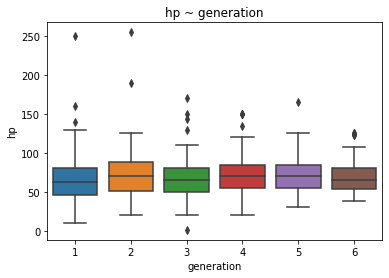

In [16]:
sb.boxplot(y=df['hp'], x=df['generation'])
plt.title('hp ~ generation');

Text(0.5, 1.0, 'defense ~ attack')

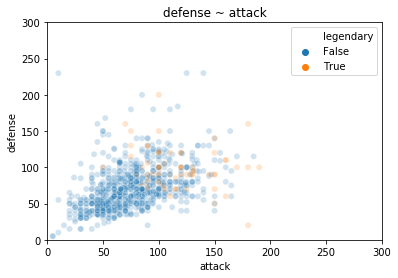

In [17]:
sb.scatterplot(data=df , x='attack', y='defense', hue='legendary', alpha=0.2);
plt.xlim(0,300)
plt.ylim(0,300)
plt.title('defense ~ attack')

In [18]:
df = pd.read_csv('fuel_econ.csv')

In [19]:
df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [20]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

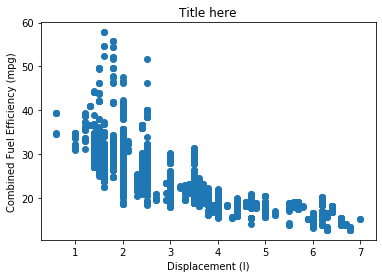

In [21]:
plt.scatter(data=df, x='displ', y='comb')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Efficiency (mpg)')
plt.title('Title here')
plt.show()

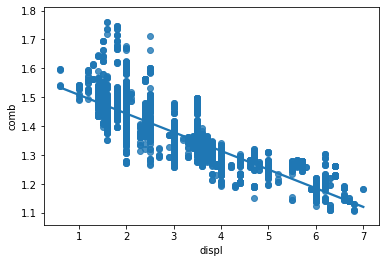

In [22]:
sb.regplot(x=df['displ'], y=df['comb'].apply(log_trans));

(2012, 2019)

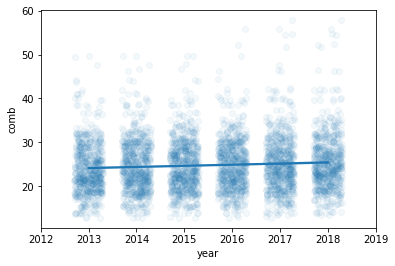

In [23]:
sb.regplot(data=df, x='year', y='comb', x_jitter=0.3, scatter_kws = {'alpha': 0.05});
plt.xlim(2012,2019)

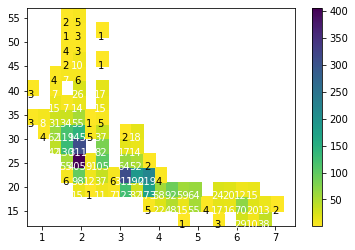

In [24]:
bins_x = np.arange(0.6, 7.6, 0.3)
bins_y = np.arange(12, 60, 3)
h2d = plt.hist2d(x=df['displ'], y=df['comb'], cmin=0.5, cmap='viridis_r', bins=[bins_x, bins_y])
plt.colorbar()

counts = h2d[0]

# loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 7: # increase visibility on darkest cells
            plt.text(bins_x[i]+0.1, bins_y[j]+0.1, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.1, bins_y[j]+0.1, int(c),
                     ha = 'center', va = 'center', color = 'black')

plt.show()

In [25]:
df.describe()

,id,year,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
count,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000
mean,36006.724357,2015.500891,5.468313,2.950573,23.660982,59.239247,21.830462,28.044011,29.973842,42.850295,24.791339,376.564266,5.668872,5.659201
std,2189.349923,1.694775,1.878319,1.305901,37.724901,48.667549,6.246273,9.087195,5.747571,9.100423,6.003246,92.338892,1.755860,1.754589
min,32204.000000,2013.000000,2.000000,0.600000,0.000000,0.000000,10.540200,12.900000,16.559400,21.800000,12.821700,29.000000,1.000000,1.000000
25%,34087.000000,2014.000000,4.000000,2.000000,0.000000,0.000000,17.746900,22.200000,25.754200,36.000000,20.658100,315.000000,5.000000,5.000000
50%,36020.000000,2015.000000,5.000000,2.500000,0.000000,91.000000,20.823200,26.400000,29.633800,42.200000,24.000000,369.000000,5.000000,5.000000
75%,37935.000000,2017.000000,6.000000,3.600000,70.000000,100.000000,24.981400,32.264800,33.773100,48.900000,28.227100,429.000000,7.000000,7.000000
max,39901.000000,2018.000000,12.000000,7.000000,102.000000,127.000000,57.808800,83.559800,59.416900,79.100000,57.782400,692.000000,10.000000,10.000000


In [26]:
df.head(5)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [27]:
df.pivot_table(index=['year','cylinders'], aggfunc='mean')

UCity   UHighway       city         co2       comb  \
year cylinders                                                           
2013 4          33.480389  48.675913  25.608902  318.455172  28.548328   
     5          26.011547  40.981400  21.423947  360.666667  24.534973   
     6          23.548167  38.372313  18.749061  410.336634  21.800686   
     8          18.809199  31.620534  15.157495  500.853211  17.870992   
     12         14.482495  25.444124  11.922576  620.666667  14.320571   
2014 2          52.500000  52.200000  41.454400   40.000000  39.485000   
     3          41.262200  57.257483  30.835333  246.166667  33.687350   
     4          33.983804  49.392470  26.005774  312.836066  28.992783   
     5          26.566038  40.922537  21.660950  357.000000  24.690525   
     6          24.302935  39.234486  19.298205  401.091346  22.370970   
     8          18.893410  31.747806  15.246259  497.660714  17.961804   
     12         14.793260  25.878350  12.177545  610.100000  14.585055   
2015 2          52.500000  52.200000  41.454400   40.000000  39.485000   
     3          39.867860  56.797340  29.993520  257.600000  33.130210   
     4          33.642065  49.445278  25.804320  313.612179  28.883487   
     5          25.600000  40.000000  20.239900  378.000000  23.162600   
     6          24.275692  39.337661  19.264941  401.365741  22.348687   
     8          19.005408  32.215379  15.316277  494.234234  18.083226   
     12         15.090415  26.780300  12.381705  598.500000  14.891840   
2016 2          52.100000  51.900000  41.401400   37.000000  39.449200   
     3          36.100883  53.578758  27.502117  279.000000  30.816908   
     4          33.795008  49.485269  25.929089  309.232919  28.989896   
     5          25.466667  39.500000  20.159933  379.666667  23.061567   
     6          24.112890  38.870438  19.133056  404.437500  22.157994   
     8          19.136619  32.636191  15.415148  489.725275  18.243187   
     12         15.152776  26.747905  12.421281  597.523810  14.912681   
2017 2          49.200000  48.400000  36.139900   29.000000  34.855100   
     3          36.215605  52.697841  27.510214  288.454545  30.674050   
     4          34.339596  49.810390  26.271224  308.829193  29.270785   
     5          23.200000  39.300000  18.948700  399.000000  22.295400   
     6          24.342950  38.988936  19.278815  401.560000  22.253901   
     8          19.079624  32.620393  15.365251  492.715789  18.166593   
     12         15.249283  26.804229  12.479250  594.625000  14.969354   
2018 2          48.670200  47.169500  35.807700   29.000000  34.535600   
     3          35.826281  52.058467  27.349129  290.952381  30.432381   
     4          34.335313  49.985373  26.284264  306.940063  29.328528   
     5          23.200000  39.050000  18.998150  397.000000  22.376150   
     6          24.643150  39.046816  19.443151  400.629268  22.373728   
     8          19.121355  32.606076  15.420037  490.565789  18.216622   
     12         14.919707  26.297573  12.204253  607.200000  14.647067   

                   displ    feScore   ghgScore    highway            id  \
year cylinders                                                            
2013 4          1.932069   7.362069   7.324138  33.520200  32885.344828   
     5          2.500000   6.200000   6.200000  29.874247  32775.933333   
     6          3.384653   5.257426   5.247525  27.253843  32790.965347   
     8          4.911009   3.853211   3.853211  22.889972  32910.275229   
     12         6.180952   2.333333   2.333333  19.015048  32888.238095   
2014 2          0.600000  10.000000  10.000000  37.318000  35279.000000   
     3          1.316667   8.666667   8.833333  38.173850  34721.166667   
     4          1.917705   7.357377   7.318033  34.051723  34138.360656   
     5          2.500000   6.250000   6.250000  29.836388  33934.125000   
     6          3.399038   5.471154   5.461538  27.846087  34024.567308   
     8     

In [28]:
counts = df.groupby(['year','cylinders']).size()
counts = counts.reset_index(name='cnt')
counts

,year,cylinders,cnt
0,2013,4,290
1,2013,5,15
2,2013,6,202
3,2013,8,109
4,2013,12,21
5,2014,2,1
6,2014,3,6
7,2014,4,305
8,2014,5,8
9,2014,6,208


In [29]:
counts = counts.pivot(index='year', columns='cylinders', values='cnt')
counts

cylinders,2,3,4,5,6,8,12
year,,,,,,,
2013,NaN,NaN,290.0,15.0,202.0,109.0,21.0
2014,1.0,6.0,305.0,8.0,208.0,112.0,20.0
2015,1.0,10.0,312.0,1.0,216.0,111.0,20.0
2016,1.0,12.0,322.0,3.0,208.0,91.0,21.0
2017,1.0,22.0,322.0,1.0,200.0,95.0,24.0
2018,2.0,21.0,317.0,2.0,205.0,76.0,15.0


In [30]:
counts = counts.replace({None: 0}).astype(int)

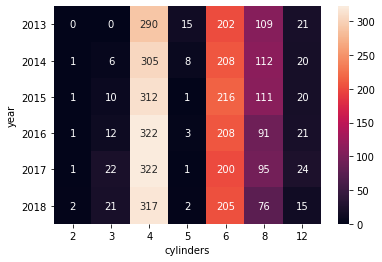

In [31]:
sb.heatmap(counts, annot=True, fmt="d"); 
plt.yticks(rotation=0)
plt.show()

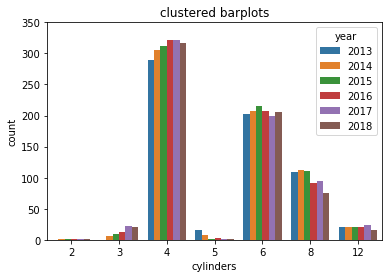

In [32]:
sb.countplot(data=df, x='cylinders', hue='year')
plt.title('clustered barplots')
plt.ylim(0,350)
plt.show()

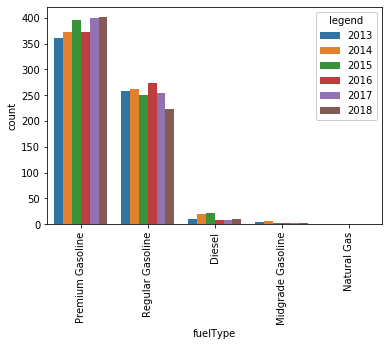

In [33]:
ax = sb.countplot(data=df, x='fuelType', hue='year')
plt.xticks(rotation=90)
ax.legend(loc = 1, ncol = 1, framealpha = 1, title = 'legend')
plt.show()

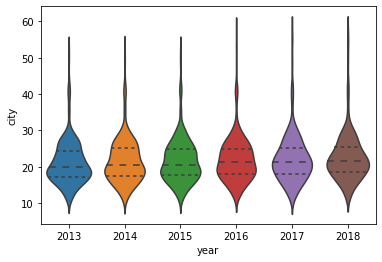

In [34]:
sb.violinplot(data = df, x='year', y='city', inner='quartile')

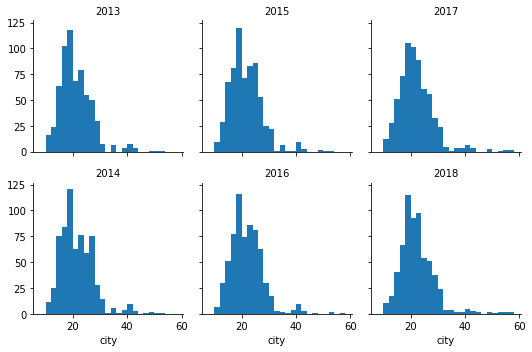

In [35]:
bins = np.arange(8,60,2)
g = sb.FacetGrid(data=df, col='year', col_wrap=3, height=2.5, col_order=[2013,2015,2017,2014,2016,2018])
g.map(plt.hist, 'city', bins=bins)
g.set_titles('{col_name}')
plt.show()

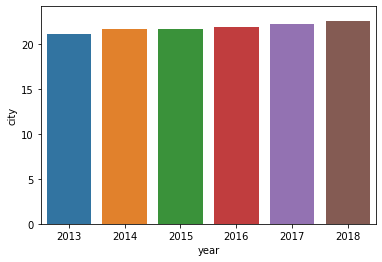

In [36]:
sb.barplot(data=df, x='year', y='city', errwidth=0)
plt.show()

/Users/schlechu/miniconda3/envs/beach/lib/python3.8/site-packages/seaborn/axisgrid.py:861: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()
/Users/schlechu/miniconda3/envs/beach/lib/python3.8/site-packages/seaborn/axisgrid.py:861: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()


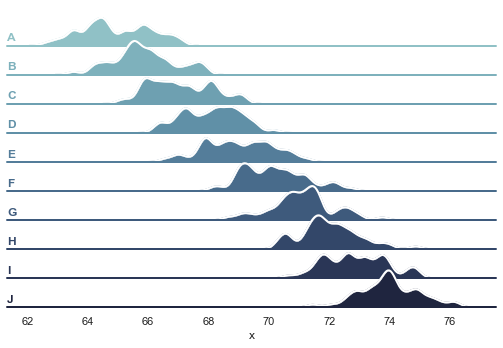

In [76]:
sb.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sb.cubehelix_palette(10, rot=-.25, light=.7)
g = sb.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sb.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sb.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
plt.show()